# Part 3 analysis
## todo:
- [ ] revise to plotly graphing library
- [x] rerun original results

## reference:
- https://www.pythonfordatascience.org/descriptive-statistics-python/

In [3]:
import pandas as pd
from colorama import Fore, Style, Back
import os
import seaborn as sns

In [4]:

data_df = pd.read_excel("/Users/poppyriddle/Documents/PhD/Research_proposal/Part_3/part_3_cohere/analysis/Round1/results/clean_analysis_results.xlsx", sheet_name="Sheet1")
data_jats_df = pd.read_excel("/Users/poppyriddle/Documents/PhD/Research_proposal/Part_3/part_3_cohere/analysis/Round1/results/jats_analysis_results.xlsx", sheet_name="Sheet1")
data_multi_lang_df = pd.read_excel("/Users/poppyriddle/Documents/PhD/Research_proposal/Part_3/part_3_cohere/analysis/Round1/results/multi_lang_analysis_results.xlsx", sheet_name="Sheet1")
#data_df.head(5)
#data_jats_df.head(5)
#data_multi_lang_df.head(5)
file_folder = "/Users/poppyriddle/Documents/PhD/Research_proposal/Part_3/part_3_cohere/analysis/Round1/tables/"

# Precision
look at precision values across all three datasets

In [5]:
# precision
data_df_grouped = data_df.groupby(data_df['Query'])[['Precision']].agg(['mean','max','min','std'])
data_df_grouped

Precision                 
                                                        mean   max   min  std
Query                                                                        
['How is RAG used to improve question answering...      0.60  0.60  0.60  0.0
['Tell me about Crossref.']                             0.80  0.80  0.80  0.0
['What are the key challenges and advancements ...      0.40  0.40  0.40  0.0
['What are the key challenges and advancements ...      0.00  0.00  0.00  0.0
['What are the key challenges and potential sol...      1.00  1.00  1.00  0.0
['What are the key features and limitations of ...      0.60  0.60  0.60  0.0
['What are the main challenges in normalizing c...      0.00  0.00  0.00  0.0
['What are the strengths and weaknesses of Web ...      0.40  0.40  0.40  0.0
['What is Crossref’s role in the scholarly rese...      1.00  1.00  1.00  0.0
['What methods are used to detect and correct e...      0.25  0.25  0.25  0.0
['Which papers address funding metadata, its av...      0.80  0.80  0.80  0.0
['Which papers discuss the use of Retrieval-Aug...      0.20  0.20  0.20  0.0
['Which papers evaluate the linguistic coverage...      0.20  0.20  0.20  0.0
['tell me about how RAG works.']                        0.40  0.40  0.40  0.0
['which studies examined citations?']                   1.00  1.00  1.00  0.0
['which studies examined the abstract in metada...      0.40  0.40  0.40  0.0

In [6]:
# combine all into one df and look at boxplot
#data_df.head(5)
#data_jats_df.head(5)
#data_multi_lang_df.head(5)
data_df_precision = data_df[['Query', 'Precision']]
data_jats_df_precision = data_jats_df[['Query','Precision']]
data_multi_lang_df_precision = data_multi_lang_df[['Query','Precision']]
print(len(data_df_precision))
print(len(data_jats_df_precision))
data_combined_precision = data_df_precision.join(data_jats_df_precision, lsuffix='_data',rsuffix='_jats', validate='one_to_one').copy()
data_combined_precision.drop(columns='Query_jats', inplace=True)
data_combined_precision = data_combined_precision.join(data_multi_lang_df_precision, rsuffix='multi_lang', validate='one_to_one').copy()
data_combined_precision.drop(columns='Query', inplace=True)
data_combined_precision = data_combined_precision.rename(columns={'Query_data':'Query','Precision_data':'Precision_data','Precision_jats':'Precision_jats','Precision':'Precision_multi_lang'})

# save out
file_name = "data_combined_precision.xlsx"
save_location = f"{file_folder}{file_name}"
data_combined_precision.to_excel(save_location)
data_combined_precision



80
80


,Query,Precision_data,Precision_jats,Precision_multi_lang
0,['which studies examined the abstract in metad...,0.40,0.500000,0.25
1,['which studies examined citations?'],1.00,0.666667,1.00
2,['Tell me about Crossref.'],0.80,0.800000,0.80
3,['Which papers evaluate the linguistic coverag...,0.20,0.200000,0.20
4,"['Which papers address funding metadata, its a...",0.80,0.600000,0.80
...,...,...,...,...
75,['What methods are used to detect and correct ...,0.25,0.250000,0.25
76,['tell me about how RAG works.'],0.40,0.400000,0.40
77,['What are the key challenges and advancements...,0.00,0.000000,0.00
78,['What are the key challenges and potential so...,1.00,1.000000,0.80


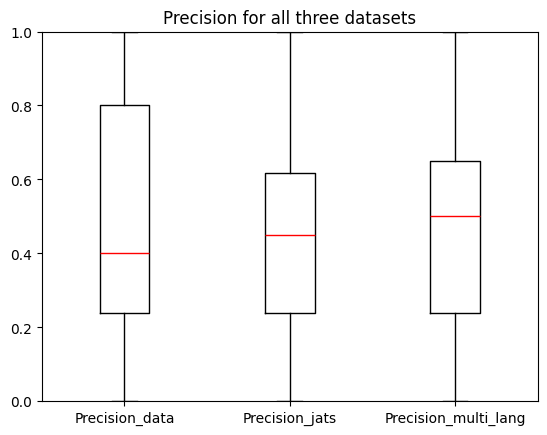

In [7]:
import matplotlib.pyplot as plt

data_combined_precision[['Precision_data','Precision_jats','Precision_multi_lang']].plot(kind='box',title='Precision for all three datasets',color=dict(boxes='black',whiskers='black',medians='red',caps='black'))
plt.ylim(0, 1.0)  # Set y-axis limits from 0 to 1.0

plt.show()

In [8]:
# get mean, max, min
data_combined_precision_grouped = pd.DataFrame(data_combined_precision.groupby(data_combined_precision['Query'])[['Precision_data', 'Precision_jats','Precision_multi_lang']].agg('mean'))

data_combined_precision_data_avg = data_combined_precision_grouped['Precision_data'].mean()
data_combined_precision_data_jats_avg = data_combined_precision_grouped['Precision_jats'].mean()
data_combined_precision_data_multi_lang_avg = data_combined_precision_grouped['Precision_multi_lang'].mean()
print(f"Precision_data column mean: {data_combined_precision_data_avg:.4f}")
print(f"Precision_jats column mean: {data_combined_precision_data_jats_avg:.4f}")
print(f"Precision_multi_lang column mean: {data_combined_precision_data_multi_lang_avg:.4f}")

data = {
    'index':[0],
    'Precision_data':data_combined_precision_data_avg,
    'Precision_jats':data_combined_precision_data_jats_avg,
    'Precision_multi_lang':data_combined_precision_data_multi_lang_avg
}
precision_grouped_means = pd.DataFrame(data)
print(Fore.CYAN+f"{precision_grouped_means}"+Style.RESET_ALL)

# save out
file_name = "data_combined_precision_grouped.xlsx"
save_location = f"{file_folder}{file_name}"
data_combined_precision_grouped.to_excel(save_location)

file_name = "precision_grouped_means.xlsx"
save_location = f"{file_folder}{file_name}"
precision_grouped_means.to_excel(save_location)
data_combined_precision_grouped

Precision_data column mean: 0.5031
Precision_jats column mean: 0.4760
Precision_multi_lang column mean: 0.4688
   index  Precision_data  Precision_jats  Precision_multi_lang
0      0        0.503125        0.476042               0.46875


,Precision_data,Precision_jats,Precision_multi_lang
Query,,,
['How is RAG used to improve question answering or information retrieval systems?'],0.60,0.600000,0.60
['Tell me about Crossref.'],0.80,0.800000,0.80
['What are the key challenges and advancements in Retrieval-Augmented Generation (RAG) systems?'],0.40,0.400000,0.60
['What are the key challenges and advancements in metadata quality assessment?'],0.00,0.000000,0.00
['What are the key challenges and potential solutions for improving metadata quality?'],1.00,1.000000,0.80
['What are the key features and limitations of OpenAlex as a bibliometric database?'],0.60,0.600000,0.60
['What are the main challenges in normalizing citation metrics across scientific fields?'],0.00,0.000000,0.00
['What are the strengths and weaknesses of Web of Science (WoS) as a bibliometric database?'],0.40,0.400000,0.40
['What is Crossref’s role in the scholarly research ecosystem?'],1.00,1.000000,0.60


# Recall scores

In [9]:
# precision
data_df_grouped = data_df.groupby(data_df['Query'])[['Recall']].agg(['mean','max','min','std'])
data_df_grouped

Recall               
                                                     mean  max  min  std
Query                                                                   
['How is RAG used to improve question answering...    0.6  0.6  0.6  0.0
['Tell me about Crossref.']                           0.8  0.8  0.8  0.0
['What are the key challenges and advancements ...    0.4  0.4  0.4  0.0
['What are the key challenges and advancements ...    0.0  0.0  0.0  0.0
['What are the key challenges and potential sol...    1.0  1.0  1.0  0.0
['What are the key features and limitations of ...    0.6  0.6  0.6  0.0
['What are the main challenges in normalizing c...    0.0  0.0  0.0  0.0
['What are the strengths and weaknesses of Web ...    0.4  0.4  0.4  0.0
['What is Crossref’s role in the scholarly rese...    0.6  0.6  0.6  0.0
['What methods are used to detect and correct e...    0.2  0.2  0.2  0.0
['Which papers address funding metadata, its av...    1.0  1.0  1.0  0.0
['Which papers discuss the use of Retrieval-Aug...    0.2  0.2  0.2  0.0
['Which papers evaluate the linguistic coverage...    0.2  0.2  0.2  0.0
['tell me about how RAG works.']                      0.4  0.4  0.4  0.0
['which studies examined citations?']                 0.6  0.6  0.6  0.0
['which studies examined the abstract in metada...    0.4  0.4  0.4  0.0

In [10]:
# combine all into one df and look at boxplot
#data_df.head(5)
#data_jats_df.head(5)
#data_multi_lang_df.head(5)
data_df_recall = data_df[['Query', 'Recall']]
data_jats_df_recall = data_jats_df[['Query','Recall']]
data_multi_lang_df_recall = data_multi_lang_df[['Query','Recall']]
print(len(data_df_recall))
print(len(data_jats_df_recall))
data_combined_recall = data_df_recall.join(data_jats_df_recall, lsuffix='_data',rsuffix='_jats', validate='one_to_one').copy()
data_combined_recall.drop(columns='Query_jats', inplace=True)
data_combined_recall = data_combined_recall.join(data_multi_lang_df_recall, rsuffix='multi_lang', validate='one_to_one').copy()
data_combined_recall.drop(columns='Query', inplace=True)
data_combined_recall = data_combined_recall.rename(columns={'Query_data':'Query','Recall_data':'Recall_data','Recall_jats':'Recall_jats','Recall':'Recall_multi_lang'})
data_combined_recall

80
80


,Query,Recall_data,Recall_jats,Recall_multi_lang
0,['which studies examined the abstract in metad...,0.4,0.40,0.2
1,['which studies examined citations?'],0.6,0.40,0.6
2,['Tell me about Crossref.'],0.8,0.80,0.8
3,['Which papers evaluate the linguistic coverag...,0.2,0.20,0.2
4,"['Which papers address funding metadata, its a...",1.0,0.75,1.0
...,...,...,...,...
75,['What methods are used to detect and correct ...,0.2,0.20,0.2
76,['tell me about how RAG works.'],0.4,0.40,0.4
77,['What are the key challenges and advancements...,0.0,0.00,0.0
78,['What are the key challenges and potential so...,1.0,1.00,0.8


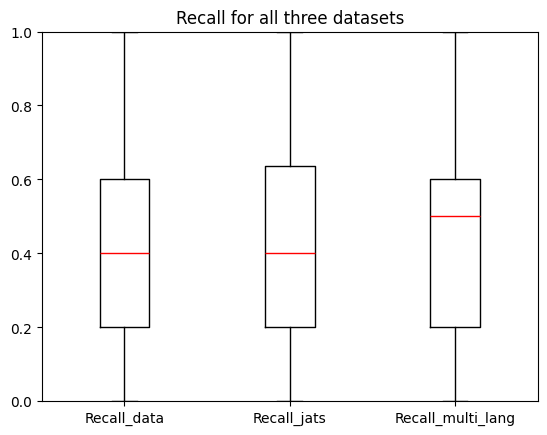

In [11]:
data_combined_recall[['Recall_data','Recall_jats','Recall_multi_lang']].plot(kind='box',title='Recall for all three datasets',color=dict(boxes='black',whiskers='black',medians='red',caps='black'))
plt.ylim(0, 1.0)  # Set y-axis limits from 0 to 1.0

plt.show()

In [12]:
# get mean, max, min
data_combined_recall_grouped = pd.DataFrame(data_combined_recall.groupby(data_combined_recall['Query'])[['Recall_data', 'Recall_jats','Recall_multi_lang']].agg('mean'))

data_combined_recall_data_avg = data_combined_recall_grouped['Recall_data'].mean()
data_combined_recall_data_jats_avg = data_combined_recall_grouped['Recall_jats'].mean()
data_combined_recall_data_multi_lang_avg = data_combined_recall_grouped['Recall_multi_lang'].mean()
print(f"Recall_data column mean: {data_combined_recall_data_avg:.4f}")
print(f"Recall_jats column mean: {data_combined_recall_data_jats_avg:.4f}")
print(f"Recall_multi_lang column mean: {data_combined_recall_data_multi_lang_avg:.4f}")

data = {
    'index':[0],
    'Recall_data':data_combined_recall_data_avg,
    'Recall_jats':data_combined_recall_data_jats_avg,
    'Recall_multi_lang':data_combined_recall_data_multi_lang_avg
}
recall_grouped_means = pd.DataFrame(data)
print(Fore.CYAN+f"{recall_grouped_means}"+Style.RESET_ALL)

# save out
file_name = "data_combined_recall_grouped.xlsx"
save_location = f"{file_folder}{file_name}"
data_combined_recall_grouped.to_excel(save_location)

file_name = "recall_grouped_means.xlsx"
save_location = f"{file_folder}{file_name}"
recall_grouped_means.to_excel(save_location)
data_combined_recall_grouped

#data_combined_recall_median = pd.DataFrame(data_combined_recall.groupby(data_combined_recall['Query'])[['Recall_data', 'Recall_jats','Recall_multi_lang']].agg('median'))
#data_combined_recall_median

Recall_data column mean: 0.4625
Recall_jats column mean: 0.4469
Recall_multi_lang column mean: 0.4500
   index  Recall_data  Recall_jats  Recall_multi_lang
0      0       0.4625     0.446875               0.45


,Recall_data,Recall_jats,Recall_multi_lang
Query,,,
['How is RAG used to improve question answering or information retrieval systems?'],0.6,0.60,0.6
['Tell me about Crossref.'],0.8,0.80,0.8
['What are the key challenges and advancements in Retrieval-Augmented Generation (RAG) systems?'],0.4,0.40,0.6
['What are the key challenges and advancements in metadata quality assessment?'],0.0,0.00,0.0
['What are the key challenges and potential solutions for improving metadata quality?'],1.0,1.00,0.8
['What are the key features and limitations of OpenAlex as a bibliometric database?'],0.6,0.60,0.6
['What are the main challenges in normalizing citation metrics across scientific fields?'],0.0,0.00,0.0
['What are the strengths and weaknesses of Web of Science (WoS) as a bibliometric database?'],0.4,0.40,0.4
['What is Crossref’s role in the scholarly research ecosystem?'],0.6,0.80,0.6


# F1 scores

In [13]:
# F1 scores
data_df_grouped = data_df.groupby(data_df['Query'])[['F1-Score']].agg(['mean','max','min','std'])
data_df_grouped

F1-Score                         
                                                        mean       max       min  std
Query                                                                                
['How is RAG used to improve question answering...  0.600000  0.600000  0.600000  0.0
['Tell me about Crossref.']                         0.800000  0.800000  0.800000  0.0
['What are the key challenges and advancements ...  0.400000  0.400000  0.400000  0.0
['What are the key challenges and advancements ...  0.000000  0.000000  0.000000  0.0
['What are the key challenges and potential sol...  1.000000  1.000000  1.000000  0.0
['What are the key features and limitations of ...  0.600000  0.600000  0.600000  0.0
['What are the main challenges in normalizing c...  0.000000  0.000000  0.000000  0.0
['What are the strengths and weaknesses of Web ...  0.400000  0.400000  0.400000  0.0
['What is Crossref’s role in the scholarly rese...  0.750000  0.750000  0.750000  0.0
['What methods are used to detect and correct e...  0.222222  0.222222  0.222222  0.0
['Which papers address funding metadata, its av...  0.888889  0.888889  0.888889  0.0
['Which papers discuss the use of Retrieval-Aug...  0.200000  0.200000  0.200000  0.0
['Which papers evaluate the linguistic coverage...  0.200000  0.200000  0.200000  0.0
['tell me about how RAG works.']                    0.400000  0.400000  0.400000  0.0
['which studies examined citations?']               0.750000  0.750000  0.750000  0.0
['which studies examined the abstract in metada...  0.400000  0.400000  0.400000  0.0

In [14]:
# combine all into one df and look at boxplot
#data_df.head(5)
#data_jats_df.head(5)
#data_multi_lang_df.head(5)
data_df_F1 = data_df[['Query', 'F1-Score']]
data_jats_df_F1 = data_jats_df[['Query','F1-Score']]
data_multi_lang_df_F1 = data_multi_lang_df[['Query','F1-Score']]
print(len(data_df_F1))
print(len(data_jats_df_F1))
data_combined_F1 = data_df_F1.join(data_jats_df_F1, lsuffix='_data',rsuffix='_jats', validate='one_to_one').copy()
data_combined_F1.drop(columns='Query_jats', inplace=True)
data_combined_F1 = data_combined_F1.join(data_multi_lang_df_F1, rsuffix='multi_lang', validate='one_to_one').copy()
data_combined_F1.drop(columns='Query', inplace=True)
data_combined_F1 = data_combined_F1.rename(columns={'Query_data':'Query','F1-Score_data':'F1-Score_data','F1-Score_jats':'F1-Score_jats','F1-Score':'F1-Score_multi_lang'})
data_combined_F1

80
80


,Query,F1-Score_data,F1-Score_jats,F1-Score_multi_lang
0,['which studies examined the abstract in metad...,0.400000,0.444444,0.222222
1,['which studies examined citations?'],0.750000,0.500000,0.750000
2,['Tell me about Crossref.'],0.800000,0.800000,0.800000
3,['Which papers evaluate the linguistic coverag...,0.200000,0.200000,0.200000
4,"['Which papers address funding metadata, its a...",0.888889,0.666667,0.888889
...,...,...,...,...
75,['What methods are used to detect and correct ...,0.222222,0.222222,0.222222
76,['tell me about how RAG works.'],0.400000,0.400000,0.400000
77,['What are the key challenges and advancements...,0.000000,0.000000,0.000000
78,['What are the key challenges and potential so...,1.000000,1.000000,0.800000


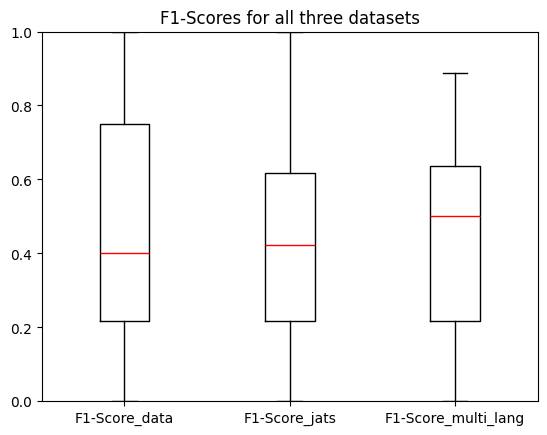

In [15]:
data_combined_F1[['F1-Score_data','F1-Score_jats','F1-Score_multi_lang']].plot(kind='box',title='F1-Scores for all three datasets',color=dict(boxes='black',whiskers='black',medians='red',caps='black'))
plt.ylim(0, 1.0)  # Set y-axis limits from 0 to 1.0

plt.show()

In [16]:
# get mean, max, min
data_combined_F1_grouped = pd.DataFrame(data_combined_F1.groupby(data_combined_F1['Query'])[['F1-Score_data', 'F1-Score_jats','F1-Score_multi_lang']].agg('mean'))

data_combined_F1_data_avg = data_combined_F1_grouped['F1-Score_data'].mean()
data_combined_F1_data_jats_avg = data_combined_F1_grouped['F1-Score_jats'].mean()
data_combined_F1_data_multi_lang_avg = data_combined_F1_grouped['F1-Score_multi_lang'].mean()
print(f"F1_data column mean: {data_combined_F1_data_avg:.4f}")
print(f"F1_jats column mean: {data_combined_F1_data_jats_avg:.4f}")
print(f"F1_multi_lang column mean: {data_combined_F1_data_multi_lang_avg:.4f}")

data = {
    'index':[0],
    'F1-Score_data':data_combined_F1_data_avg,
    'F1-Score_jats':data_combined_F1_data_jats_avg,
    'F1-Score_multi_lang':data_combined_F1_data_multi_lang_avg
}
F1_grouped_means = pd.DataFrame(data)
print(Fore.CYAN+f"{F1_grouped_means}"+Style.RESET_ALL)

# save out
file_name = "data_combined_F1_grouped.xlsx"
save_location = f"{file_folder}{file_name}"
data_combined_F1_grouped.to_excel(save_location)

file_name = "F1_grouped_means.xlsx"
save_location = f"{file_folder}{file_name}"
F1_grouped_means.to_excel(save_location)
data_combined_F1_grouped

F1_data column mean: 0.4757
F1_jats column mean: 0.4576
F1_multi_lang column mean: 0.4552
   index  F1-Score_data  F1-Score_jats  F1-Score_multi_lang
0      0       0.475694       0.457639             0.455208


,F1-Score_data,F1-Score_jats,F1-Score_multi_lang
Query,,,
['How is RAG used to improve question answering or information retrieval systems?'],0.600000,0.600000,0.600000
['Tell me about Crossref.'],0.800000,0.800000,0.800000
['What are the key challenges and advancements in Retrieval-Augmented Generation (RAG) systems?'],0.400000,0.400000,0.600000
['What are the key challenges and advancements in metadata quality assessment?'],0.000000,0.000000,0.000000
['What are the key challenges and potential solutions for improving metadata quality?'],1.000000,1.000000,0.800000
['What are the key features and limitations of OpenAlex as a bibliometric database?'],0.600000,0.600000,0.600000
['What are the main challenges in normalizing citation metrics across scientific fields?'],0.000000,0.000000,0.000000
['What are the strengths and weaknesses of Web of Science (WoS) as a bibliometric database?'],0.400000,0.400000,0.400000
['What is Crossref’s role in the scholarly research ecosystem?'],0.750000,0.888889,0.600000


# Accuracy

In [17]:
# accuracy scores
data_df_grouped = data_df.groupby(data_df['Query'])[['Accuracy']].agg(['mean','max','min','std'])
data_df_grouped

Accuracy                         
                                                        mean       max       min  std
Query                                                                                
['How is RAG used to improve question answering...  0.958333  0.958333  0.958333  0.0
['Tell me about Crossref.']                         0.979167  0.979167  0.979167  0.0
['What are the key challenges and advancements ...  0.937500  0.937500  0.937500  0.0
['What are the key challenges and advancements ...  0.895833  0.895833  0.895833  0.0
['What are the key challenges and potential sol...  1.000000  1.000000  1.000000  0.0
['What are the key features and limitations of ...  0.958333  0.958333  0.958333  0.0
['What are the main challenges in normalizing c...  0.947917  0.947917  0.947917  0.0
['What are the strengths and weaknesses of Web ...  0.937500  0.937500  0.937500  0.0
['What is Crossref’s role in the scholarly rese...  0.979167  0.979167  0.979167  0.0
['What methods are used to detect and correct e...  0.927083  0.927083  0.927083  0.0
['Which papers address funding metadata, its av...  0.989583  0.989583  0.989583  0.0
['Which papers discuss the use of Retrieval-Aug...  0.916667  0.916667  0.916667  0.0
['Which papers evaluate the linguistic coverage...  0.916667  0.916667  0.916667  0.0
['tell me about how RAG works.']                    0.937500  0.937500  0.937500  0.0
['which studies examined citations?']               0.979167  0.979167  0.979167  0.0
['which studies examined the abstract in metada...  0.937500  0.937500  0.937500  0.0

In [18]:
# combine all into one df and look at boxplot

data_df_accuracy = data_df[['Query', 'Accuracy']]
data_jats_df_accuracy = data_jats_df[['Query','Accuracy']]
data_multi_lang_df_accuracy = data_multi_lang_df[['Query','Accuracy']]
print(len(data_df_accuracy))
print(len(data_jats_df_accuracy))
data_combined_accuracy = data_df_accuracy.join(data_jats_df_accuracy, lsuffix='_data',rsuffix='_jats', validate='one_to_one').copy()
data_combined_accuracy.drop(columns='Query_jats', inplace=True)
data_combined_accuracy = data_combined_accuracy.join(data_multi_lang_df_accuracy, rsuffix='multi_lang', validate='one_to_one').copy()
data_combined_accuracy.drop(columns='Query', inplace=True)
data_combined_accuracy = data_combined_accuracy.rename(columns={'Query_data':'Query','Accuracy_data':'Accuracy_data','Accuracy_jats':'Accuracy_jats','Accuracy':'Accuracy_multi_lang'})
data_combined_accuracy

80
80


,Query,Accuracy_data,Accuracy_jats,Accuracy_multi_lang
0,['which studies examined the abstract in metad...,0.937500,0.947917,0.927083
1,['which studies examined citations?'],0.979167,0.958333,0.979167
2,['Tell me about Crossref.'],0.979167,0.979167,0.979167
3,['Which papers evaluate the linguistic coverag...,0.916667,0.916667,0.916667
4,"['Which papers address funding metadata, its a...",0.989583,0.968750,0.989583
...,...,...,...,...
75,['What methods are used to detect and correct ...,0.927083,0.927083,0.927083
76,['tell me about how RAG works.'],0.937500,0.937500,0.937500
77,['What are the key challenges and advancements...,0.895833,0.895833,0.895833
78,['What are the key challenges and potential so...,1.000000,1.000000,0.979167


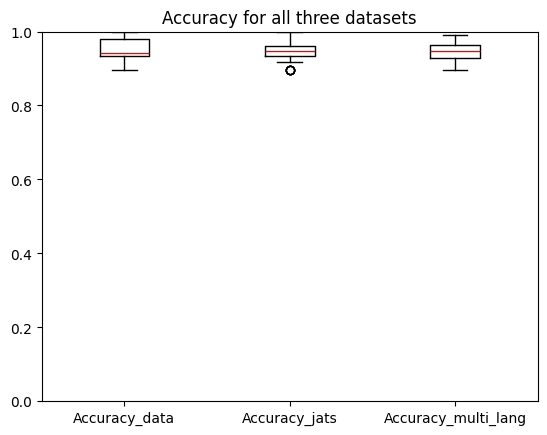

In [19]:
data_combined_accuracy[['Accuracy_data','Accuracy_jats','Accuracy_multi_lang']].plot(kind='box',title='Accuracy for all three datasets',color=dict(boxes='black',whiskers='black',medians='red',caps='black'))
plt.ylim(0, 1.0)  # Set y-axis limits from 0 to 1.0

plt.show()

In [20]:
# get mean, max, min
data_combined_accuracy_grouped = pd.DataFrame(data_combined_accuracy.groupby(data_combined_accuracy['Query'])[['Accuracy_data', 'Accuracy_jats','Accuracy_multi_lang']].agg('mean'))

data_combined_accuracy_data_avg = data_combined_accuracy_grouped['Accuracy_data'].mean()
data_combined_accuracy_data_jats_avg = data_combined_accuracy_grouped['Accuracy_jats'].mean()
data_combined_accuracy_data_multi_lang_avg = data_combined_accuracy_grouped['Accuracy_multi_lang'].mean()
print(f"accuracy_data column mean: {data_combined_accuracy_data_avg:.4f}")
print(f"accuracy_jats column mean: {data_combined_accuracy_data_jats_avg:.4f}")
print(f"accuracy_multi_lang column mean: {data_combined_accuracy_data_multi_lang_avg:.4f}")

data = {
    'index':[0],
    'Accuracy_data':data_combined_accuracy_data_avg,
    'Accuracy_jats':data_combined_accuracy_data_jats_avg,
    'Accuracy_multi_lang':data_combined_accuracy_data_multi_lang_avg
}
accuracy_grouped_means = pd.DataFrame(data)
print(Fore.CYAN+f"{accuracy_grouped_means}"+Style.RESET_ALL)

# save out
file_name = "data_combined_accuracy_grouped.xlsx"
save_location = f"{file_folder}{file_name}"
data_combined_accuracy_grouped.to_excel(save_location)

file_name = "accuracy_grouped_means.xlsx"
save_location = f"{file_folder}{file_name}"
accuracy_grouped_means.to_excel(save_location)
data_combined_accuracy_grouped

accuracy_data column mean: 0.9499
accuracy_jats column mean: 0.9486
accuracy_multi_lang column mean: 0.9473
   index  Accuracy_data  Accuracy_jats  Accuracy_multi_lang
0      0        0.94987       0.948568             0.947266


,Accuracy_data,Accuracy_jats,Accuracy_multi_lang
Query,,,
['How is RAG used to improve question answering or information retrieval systems?'],0.958333,0.958333,0.958333
['Tell me about Crossref.'],0.979167,0.979167,0.979167
['What are the key challenges and advancements in Retrieval-Augmented Generation (RAG) systems?'],0.937500,0.937500,0.958333
['What are the key challenges and advancements in metadata quality assessment?'],0.895833,0.895833,0.895833
['What are the key challenges and potential solutions for improving metadata quality?'],1.000000,1.000000,0.979167
['What are the key features and limitations of OpenAlex as a bibliometric database?'],0.958333,0.958333,0.958333
['What are the main challenges in normalizing citation metrics across scientific fields?'],0.947917,0.947917,0.937500
['What are the strengths and weaknesses of Web of Science (WoS) as a bibliometric database?'],0.937500,0.937500,0.937500
['What is Crossref’s role in the scholarly research ecosystem?'],0.979167,0.989583,0.958333


# Balanced accuracy

In [21]:
# accuracy scores
data_df_grouped = data_df.groupby(data_df['Query'])[['Balanced accuracy']].agg(['mean','max','min','std'])
data_df_grouped

Balanced accuracy                         
                                                                mean       max       min  std
Query                                                                                        
['How is RAG used to improve question answering...          0.789011  0.789011  0.789011  0.0
['Tell me about Crossref.']                                 0.894505  0.894505  0.894505  0.0
['What are the key challenges and advancements ...          0.683516  0.683516  0.683516  0.0
['What are the key challenges and advancements ...          0.472527  0.472527  0.472527  0.0
['What are the key challenges and potential sol...          1.000000  1.000000  1.000000  0.0
['What are the key features and limitations of ...          0.789011  0.789011  0.789011  0.0
['What are the main challenges in normalizing c...          0.500000  0.500000  0.500000  0.0
['What are the strengths and weaknesses of Web ...          0.683516  0.683516  0.683516  0.0
['What is Crossref’s role in the scholarly rese...          0.800000  0.800000  0.800000  0.0
['What methods are used to detect and correct e...          0.583516  0.583516  0.583516  0.0
['Which papers address funding metadata, its av...          0.994565  0.994565  0.994565  0.0
['Which papers discuss the use of Retrieval-Aug...          0.578022  0.578022  0.578022  0.0
['Which papers evaluate the linguistic coverage...          0.578022  0.578022  0.578022  0.0
['tell me about how RAG works.']                            0.683516  0.683516  0.683516  0.0
['which studies examined citations?']                       0.800000  0.800000  0.800000  0.0
['which studies examined the abstract in metada...          0.683516  0.683516  0.683516  0.0

In [22]:
# combine into one df
data_df_bal_accuracy = data_df[['Query', 'Balanced accuracy']]
data_jats_df_bal_accuracy = data_jats_df[['Query','Balanced accuracy']]
data_multi_lang_df_bal_accuracy = data_multi_lang_df[['Query','Balanced accuracy']]
print(len(data_df_bal_accuracy))
print(len(data_jats_df_bal_accuracy))
data_combined_bal_accuracy = data_df_bal_accuracy.join(data_jats_df_bal_accuracy, lsuffix='_data',rsuffix='_jats', validate='one_to_one').copy()
data_combined_bal_accuracy.drop(columns='Query_jats', inplace=True)
data_combined_bal_accuracy = data_combined_bal_accuracy.join(data_multi_lang_df_bal_accuracy, rsuffix='multi_lang', validate='one_to_one').copy()
data_combined_bal_accuracy.drop(columns='Query', inplace=True)
data_combined_bal_accuracy = data_combined_bal_accuracy.rename(columns={'Query_data':'Query','Balanced accuracy_data':'Balanced accuracy_data','Balanced accuracy_jats':'Balanced accuracy_jats','Balanced accuracy':'Balanced accuracy_multi_lang'})
data_combined_bal_accuracy

80
80


,Query,Balanced accuracy_data,Balanced accuracy_jats,Balanced accuracy_multi_lang
0,['which studies examined the abstract in metad...,0.683516,0.689011,0.583516
1,['which studies examined citations?'],0.800000,0.694505,0.800000
2,['Tell me about Crossref.'],0.894505,0.894505,0.894505
3,['Which papers evaluate the linguistic coverag...,0.578022,0.578022,0.578022
4,"['Which papers address funding metadata, its a...",0.994565,0.864130,0.994565
...,...,...,...,...
75,['What methods are used to detect and correct ...,0.583516,0.583516,0.583516
76,['tell me about how RAG works.'],0.683516,0.683516,0.683516
77,['What are the key challenges and advancements...,0.472527,0.472527,0.472527
78,['What are the key challenges and potential so...,1.000000,1.000000,0.894505


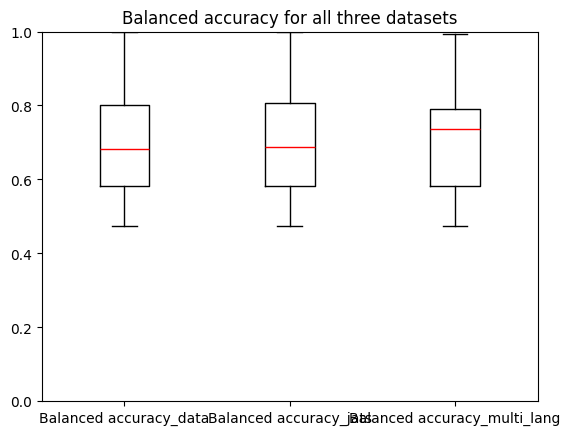

In [23]:
data_combined_bal_accuracy[['Balanced accuracy_data','Balanced accuracy_jats','Balanced accuracy_multi_lang']].plot(kind='box',title='Balanced accuracy for all three datasets',color=dict(boxes='black',whiskers='black',medians='red',caps='black'))
plt.ylim(0, 1.0)  # Set y-axis limits from 0 to 1.0

plt.show()

In [24]:
# get mean, max, min
data_combined_bal_accuracy_grouped = pd.DataFrame(data_combined_bal_accuracy.groupby(data_combined_bal_accuracy['Query'])[['Balanced accuracy_data', 'Balanced accuracy_jats','Balanced accuracy_multi_lang']].agg('mean'))

data_combined_bal_accuracy_data_avg = data_combined_bal_accuracy_grouped['Balanced accuracy_data'].mean()
data_combined_bal_accuracy_data_jats_avg = data_combined_bal_accuracy_grouped['Balanced accuracy_jats'].mean()
data_combined_bal_accuracy_data_multi_lang_avg = data_combined_bal_accuracy_grouped['Balanced accuracy_multi_lang'].mean()
print(f"bal_accuracy_data column mean: {data_combined_bal_accuracy_data_avg:.4f}")
print(f"bal_accuracy_jats column mean: {data_combined_bal_accuracy_data_jats_avg:.4f}")
print(f"bal_accuracy_multi_lang column mean: {data_combined_bal_accuracy_data_multi_lang_avg:.4f}")

data = {
    'index':[0],
    'Balanced accuracy_data':data_combined_bal_accuracy_data_avg,
    'Balanced accuracy_jats':data_combined_bal_accuracy_data_jats_avg,
    'Balanced accuracy_multi_lang':data_combined_bal_accuracy_data_multi_lang_avg
}
bal_accuracy_grouped_means = pd.DataFrame(data)
print(Fore.CYAN+f"{bal_accuracy_grouped_means}"+Style.RESET_ALL)

# save out
file_name = "data_combined_bal_accuracy_grouped.xlsx"
save_location = f"{file_folder}{file_name}"
data_combined_bal_accuracy_grouped.to_excel(save_location)

file_name = "bal_accuracy_grouped_means.xlsx"
save_location = f"{file_folder}{file_name}"
bal_accuracy_grouped_means.to_excel(save_location)
data_combined_bal_accuracy_grouped

bal_accuracy_data column mean: 0.7196
bal_accuracy_jats column mean: 0.7114
bal_accuracy_multi_lang column mean: 0.7123
   index  Balanced accuracy_data  Balanced accuracy_jats  Balanced accuracy_multi_lang
0      0                0.719578                0.711426                      0.712298


,Balanced accuracy_data,Balanced accuracy_jats,Balanced accuracy_multi_lang
Query,,,
['How is RAG used to improve question answering or information retrieval systems?'],0.789011,0.789011,0.789011
['Tell me about Crossref.'],0.894505,0.894505,0.894505
['What are the key challenges and advancements in Retrieval-Augmented Generation (RAG) systems?'],0.683516,0.683516,0.789011
['What are the key challenges and advancements in metadata quality assessment?'],0.472527,0.472527,0.472527
['What are the key challenges and potential solutions for improving metadata quality?'],1.000000,1.000000,0.894505
['What are the key features and limitations of OpenAlex as a bibliometric database?'],0.789011,0.789011,0.789011
['What are the main challenges in normalizing citation metrics across scientific fields?'],0.500000,0.500000,0.494505
['What are the strengths and weaknesses of Web of Science (WoS) as a bibliometric database?'],0.683516,0.683516,0.683516
['What is Crossref’s role in the scholarly research ecosystem?'],0.800000,0.900000,0.789011


# Faithfulness score


In [25]:
#Faithfulness score
data_df_grouped = data_df.groupby(data_df['Query'])[['Faithfulness score']].agg(['mean','max','min','std'])
data_df_grouped

Faithfulness score                  
                                                                 mean max min       std
Query                                                                                  
['How is RAG used to improve question answering...                5.0   5   5  0.000000
['Tell me about Crossref.']                                       2.6   5   1  2.190890
['What are the key challenges and advancements ...                5.0   5   5  0.000000
['What are the key challenges and advancements ...                5.0   5   5  0.000000
['What are the key challenges and potential sol...                2.6   5   1  1.816590
['What are the key features and limitations of ...                5.0   5   5  0.000000
['What are the main challenges in normalizing c...                0.0   0   0  0.000000
['What are the strengths and weaknesses of Web ...                4.0   5   0  2.236068
['What is Crossref’s role in the scholarly rese...                2.2   3   1  1.095445
['What methods are used to detect and correct e...                1.0   1   1  0.000000
['Which papers address funding metadata, its av...                4.4   5   4  0.547723
['Which papers discuss the use of Retrieval-Aug...                4.2   5   4  0.447214
['Which papers evaluate the linguistic coverage...                4.0   5   2  1.414214
['tell me about how RAG works.']                                  3.4   4   1  1.341641
['which studies examined citations?']                             3.0   3   3  0.000000
['which studies examined the abstract in metada...                2.6   3   2  0.547723

In [26]:
# combine into one df
data_df_faithfulness = data_df[['Query', 'Faithfulness score']]
data_jats_df_faithfulness = data_jats_df[['Query','Faithfulness score']]
data_multi_lang_df_faithfulness = data_multi_lang_df[['Query','Faithfulness score']]
print(len(data_df_faithfulness))
print(len(data_jats_df_faithfulness))
data_combined_faithfulness = data_df_faithfulness.join(data_jats_df_faithfulness, lsuffix='_data',rsuffix='_jats', validate='one_to_one').copy()
data_combined_faithfulness.drop(columns='Query_jats', inplace=True)
data_combined_faithfulness = data_combined_faithfulness.join(data_multi_lang_df_faithfulness, rsuffix='multi_lang', validate='one_to_one').copy()
data_combined_faithfulness.drop(columns='Query', inplace=True)
data_combined_faithfulness = data_combined_faithfulness.rename(columns={'Query_data':'Query','Faithfulness score_data':'Faithfulness score_data','Faithfulness score_jats':'Faithfulness score_jats','Faithfulness score':'Faithfulness score_multi_lang'})
data_combined_faithfulness

80
80


,Query,Faithfulness score_data,Faithfulness score_jats,Faithfulness score_multi_lang
0,['which studies examined the abstract in metad...,2,3,3
1,['which studies examined citations?'],3,2,3
2,['Tell me about Crossref.'],5,1,1
3,['Which papers evaluate the linguistic coverag...,3,4,4
4,"['Which papers address funding metadata, its a...",4,5,4
...,...,...,...,...
75,['What methods are used to detect and correct ...,1,4,2
76,['tell me about how RAG works.'],4,4,5
77,['What are the key challenges and advancements...,5,5,5
78,['What are the key challenges and potential so...,1,1,1


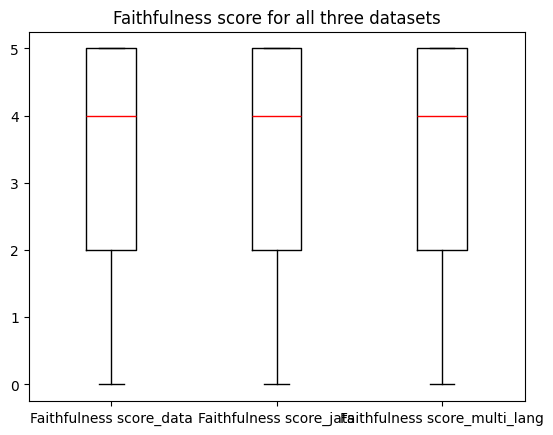

In [27]:
data_combined_faithfulness[['Faithfulness score_data','Faithfulness score_jats','Faithfulness score_multi_lang']].plot(kind='box',title='Faithfulness score for all three datasets',color=dict(boxes='black',whiskers='black',medians='red',caps='black'))
#plt.ylim(0, 5.0)  # Set y-axis limits from 0 to 1.0

plt.show()

In [28]:
# get mean, max, min
data_combined_faithfulness_grouped = pd.DataFrame(data_combined_faithfulness.groupby(data_combined_faithfulness['Query'])[['Faithfulness score_data', 'Faithfulness score_jats','Faithfulness score_multi_lang']].agg('mean'))

data_combined_faithfulness_data_avg = data_combined_faithfulness_grouped['Faithfulness score_data'].mean()
data_combined_faithfulness_data_jats_avg = data_combined_faithfulness_grouped['Faithfulness score_jats'].mean()
data_combined_faithfulness_data_multi_lang_avg = data_combined_faithfulness_grouped['Faithfulness score_multi_lang'].mean()
print(f"faithfulness_data column mean: {data_combined_faithfulness_data_avg:.4f}")
print(f"faithfulness_jats column mean: {data_combined_faithfulness_data_jats_avg:.4f}")
print(f"faithfulness_multi_lang column mean: {data_combined_faithfulness_data_multi_lang_avg:.4f}")

data = {
    'index':[0],
    'Faithfulness score_data':data_combined_faithfulness_data_avg,
    'Faithfulness score_jats':data_combined_faithfulness_data_jats_avg,
    'Faithfulness score_multi_lang':data_combined_faithfulness_data_multi_lang_avg
}
faithfulness_grouped_means = pd.DataFrame(data)
print(Fore.CYAN+f"{faithfulness_grouped_means}"+Style.RESET_ALL)

# save out
file_name = "data_combined_faithfulness_grouped.xlsx"
save_location = f"{file_folder}{file_name}"
data_combined_faithfulness_grouped.to_excel(save_location)

file_name = "faithfulness_grouped_means.xlsx"
save_location = f"{file_folder}{file_name}"
faithfulness_grouped_means.to_excel(save_location)
data_combined_faithfulness_grouped

faithfulness_data column mean: 3.3750
faithfulness_jats column mean: 3.5375
faithfulness_multi_lang column mean: 3.4625
   index  Faithfulness score_data  Faithfulness score_jats  Faithfulness score_multi_lang
0      0                    3.375                   3.5375                         3.4625


,Faithfulness score_data,Faithfulness score_jats,Faithfulness score_multi_lang
Query,,,
['How is RAG used to improve question answering or information retrieval systems?'],5.0,5.0,5.0
['Tell me about Crossref.'],2.6,1.8,2.6
['What are the key challenges and advancements in Retrieval-Augmented Generation (RAG) systems?'],5.0,5.0,5.0
['What are the key challenges and advancements in metadata quality assessment?'],5.0,5.0,5.0
['What are the key challenges and potential solutions for improving metadata quality?'],2.6,2.4,3.6
['What are the key features and limitations of OpenAlex as a bibliometric database?'],5.0,5.0,5.0
['What are the main challenges in normalizing citation metrics across scientific fields?'],0.0,0.0,1.0
['What are the strengths and weaknesses of Web of Science (WoS) as a bibliometric database?'],4.0,4.4,3.6
['What is Crossref’s role in the scholarly research ecosystem?'],2.2,3.4,1.0


# Documents score
* NOTE 
There are two cells below - make sure you run the correct one for your data


## The following cell only works for documents score data from the v5 notebook
** only run this one for part_3_Cohere_RAG.ipynb results **

In [29]:
# special one for testing documents soore on Part_3_Cohere_RAG v5 notebook
#test_data = pd.read_excel("/Users/poppyriddle/Documents/PhD/Research_proposal/Part_3/part_3_cohere/analysis/dense_analysis_results.xlsx")

#test_data_doc_score = pd.DataFrame(test_data['Documents score'])
#test_data_doc_score

#data_documents_score_df = pd.DataFrame(test_data['Documents score'])
#data_jats_documents_score_df = pd.DataFrame(test_data['Documents score'])
#data_multi_lang_documents_score_df = pd.DataFrame(test_data['Documents score'])

#print(test_data_doc_score.iloc[0,0].strip('[]'))
#data_documents_score_df['Documents score'] = data_documents_score_df['Documents score'].apply(lambda x: x.strip('[]'))
#data_documents_score_df['Documents score'] = data_documents_score_df['Documents score'].apply(lambda x: literal_eval(x))
#******** THE ABOVE SECTION WAS FOR DEBUGGING **************

# Documents score
from ast import literal_eval
#data_df.head(5)
#data_jats_df.head(5)
#data_multi_lang_df.head(5)

data_documents_score_df = pd.DataFrame(data_df['Documents score'])
data_jats_documents_score_df = pd.DataFrame(data_jats_df['Documents score'])
data_multi_lang_documents_score_df = pd.DataFrame(data_multi_lang_df['Documents score'])

# Strip off brackets
data_documents_score_df['Documents score'] = data_documents_score_df['Documents score'].apply(lambda x: x.strip('[]'))
data_jats_documents_score_df['Documents score'] = data_jats_documents_score_df['Documents score'].apply(lambda x: x.strip('[]'))
data_multi_lang_documents_score_df['Documents score'] = data_multi_lang_documents_score_df['Documents score'].apply(lambda x: x.strip('[]'))

#read the strings as literals
data_documents_score_df['Documents score'] = data_documents_score_df['Documents score'].apply(lambda x: literal_eval(x) )
data_jats_documents_score_df['Documents score'] = data_jats_documents_score_df['Documents score'].apply(lambda x: literal_eval(x) )
data_multi_lang_documents_score_df['Documents score'] = data_multi_lang_documents_score_df['Documents score'].apply(lambda x: literal_eval(x) )
#explode nested lists into one column
data_documents_score_flatten = data_documents_score_df.explode(column='Documents score')
data_jats_documents_score_flatten = data_jats_documents_score_df.explode(column='Documents score')
data_multi_lang_documents_score_flatten = data_multi_lang_documents_score_df.explode(column='Documents score')
#separate tuple into columns
data_documents_exploded = pd.DataFrame()
data_documents_exploded[['Score','DOI']] = pd.DataFrame(data_documents_score_flatten['Documents score'].tolist(),index=data_documents_score_flatten.index)
print(len(data_documents_score_flatten))
cols = list(data_documents_exploded.columns)
cols = cols[1::2] + cols[::2]
data_documents_exploded = data_documents_exploded[cols]
data_documents_exploded

#same again for jats dataset
data_jats_documents_exploded = pd.DataFrame()
data_jats_documents_exploded[['Score','DOI']] = pd.DataFrame(data_jats_documents_score_flatten['Documents score'].tolist(),index=data_jats_documents_score_flatten.index)
print(Fore.LIGHTGREEN_EX + f"length of jats: {len(data_jats_documents_score_flatten)}")
cols = list(data_jats_documents_exploded.columns)
cols = cols[1::2] + cols[::2]
data_jats_documents_exploded = data_jats_documents_exploded[cols]
data_jats_documents_exploded

# and again for multi_lang dataset
data_multi_lang_documents_exploded = pd.DataFrame()
data_multi_lang_documents_exploded[['Score','DOI']] = pd.DataFrame(data_multi_lang_documents_score_flatten['Documents score'].tolist(),index=data_multi_lang_documents_score_flatten.index)
print(Fore.LIGHTCYAN_EX + f"length of multi_lang: {len(data_multi_lang_documents_score_flatten)}")
cols = list(data_multi_lang_documents_exploded.columns)
cols = cols[1::2] + cols[::2]
data_multi_lang_documents_exploded = data_multi_lang_documents_exploded[cols]
data_multi_lang_documents_exploded

SyntaxError: invalid syntax (<unknown>, line 0)

## The following cell is for the Part_3_V6_Cohere_RAG.ipynb
** skip if you ran the cell above **

In [30]:
# Documents score
from ast import literal_eval
#data_df.head(5)
#data_jats_df.head(5)
#data_multi_lang_df.head(5)

data_documents_score_df = pd.DataFrame(data_df['Documents score'])
data_jats_documents_score_df = pd.DataFrame(data_jats_df['Documents score'])
data_multi_lang_documents_score_df = pd.DataFrame(data_multi_lang_df['Documents score'])
#read the strings as literals
data_documents_score_df['Documents score'] = data_documents_score_df['Documents score'].apply(lambda x: literal_eval(x) )
data_jats_documents_score_df['Documents score'] = data_jats_documents_score_df['Documents score'].apply(lambda x: literal_eval(x) )
data_multi_lang_documents_score_df['Documents score'] = data_multi_lang_documents_score_df['Documents score'].apply(lambda x: literal_eval(x) )
#explode nested lists into one column
data_documents_score_flatten = data_documents_score_df.explode(column='Documents score')
data_jats_documents_score_flatten = data_jats_documents_score_df.explode(column='Documents score')
data_multi_lang_documents_score_flatten = data_multi_lang_documents_score_df.explode(column='Documents score')
#separate tuple into columns
data_documents_exploded = pd.DataFrame()
data_documents_exploded[['Score','DOI']] = pd.DataFrame(data_documents_score_flatten['Documents score'].tolist(),index=data_documents_score_flatten.index)
print(len(data_documents_score_flatten))
cols = list(data_documents_exploded.columns)
cols = cols[1::2] + cols[::2]
data_documents_exploded = data_documents_exploded[cols]
data_documents_exploded

#same again for jats dataset
data_jats_documents_exploded = pd.DataFrame()
data_jats_documents_exploded[['Score','DOI']] = pd.DataFrame(data_jats_documents_score_flatten['Documents score'].tolist(),index=data_jats_documents_score_flatten.index)
print(Fore.LIGHTGREEN_EX + f"length of jats: {len(data_jats_documents_score_flatten)}")
cols = list(data_jats_documents_exploded.columns)
cols = cols[1::2] + cols[::2]
data_jats_documents_exploded = data_jats_documents_exploded[cols]
data_jats_documents_exploded

# and again for multi_lang dataset
data_multi_lang_documents_exploded = pd.DataFrame()
data_multi_lang_documents_exploded[['Score','DOI']] = pd.DataFrame(data_multi_lang_documents_score_flatten['Documents score'].tolist(),index=data_multi_lang_documents_score_flatten.index)
print(Fore.LIGHTCYAN_EX + f"length of multi_lang: {len(data_multi_lang_documents_score_flatten)}")
cols = list(data_multi_lang_documents_exploded.columns)
cols = cols[1::2] + cols[::2]
data_multi_lang_documents_exploded = data_multi_lang_documents_exploded[cols]
data_multi_lang_documents_exploded

355
length of jats: 355
length of multi_lang: 360


,DOI,Score
0,10.1162/qss_a_00286,0.631799
0,10.1177/09610006241239080,0.589197
0,10.1109/ADL.1998.670425,0.554206
0,10.5281/zenodo.14006424,0.186881
1,10.1108/JD-10-2022-0234,0.357097
...,...,...
79,10.48550/arXiv.2312.10997,0.922434
79,10.1016/j.caeai.2025.100417,0.876814
79,10.48550/arXiv.2505.18247,0.727221
79,10.1007/s44427-025-00006-3,0.664127


In [31]:
# create a df with all mean scores for each DOI
data_documents_score_grouped = pd.DataFrame(data_documents_exploded.groupby(data_documents_exploded['DOI'])['Score'].agg(['mean']))
data_documents_score_grouped = data_documents_score_grouped.sort_values('mean',ascending=False)
data_documents_score_grouped

data_jats_documents_score_grouped = pd.DataFrame(data_jats_documents_exploded.groupby(data_jats_documents_exploded['DOI'])['Score'].agg(['mean']))
data_jats_documents_score_grouped

data_multi_lang_documents_score_grouped = pd.DataFrame(data_multi_lang_documents_exploded.groupby(data_multi_lang_documents_exploded['DOI'])['Score'].agg(['mean']))
data_multi_lang_documents_score_grouped
# reset index so that DOI is a proper column
data_documents_score_grouped.reset_index(inplace=True,drop=False)
data_jats_documents_score_grouped.reset_index(inplace=True,drop=False)
data_multi_lang_documents_score_grouped.reset_index(inplace=True,drop=False)


data_documents_score_grouped_together = data_documents_score_grouped.merge(data_jats_documents_score_grouped,left_on='DOI',right_on='DOI',how="inner")
data_documents_score_grouped_together = data_documents_score_grouped_together.merge(data_multi_lang_documents_score_grouped, left_on='DOI', right_on='DOI',how="inner")
data_documents_score_grouped_together.rename(inplace=True, columns={'DOI':'DOI',
                                                                    'mean_x':'data_mean',
                                                                    'mean_y':'jats_mean',
                                                                    'mean':'multi_lang_mean'})

# save out
file_name = "data_documents_score_grouped_together.xlsx"
save_location = f"{file_folder}{file_name}"
data_documents_score_grouped_together.to_excel(save_location)

data_documents_score_grouped_together

,DOI,data_mean,jats_mean,multi_lang_mean
0,10.1016/j.caeai.2025.100417,0.872915,0.870328,0.886355
1,10.1162/qss_a_00022,0.852298,0.725988,0.867204
2,10.48550/arXiv.2404.17663,0.836461,0.840901,0.845548
3,10.48550/arXiv.2312.10997,0.803753,0.799768,0.761821
4,10.17821/srels/2024/v61i5/171583,0.778330,0.773234,0.811333
5,10.48550/arXiv.2409.10633,0.688769,0.694834,0.777125
6,10.48550/arXiv.2505.13557,0.658616,0.653857,0.720192
7,10.6109/jkiice.2023.27.12.1489,0.653834,0.643858,0.708929
8,10.48550/arXiv.2505.18247,0.646179,0.572652,0.644326
9,10.48550/arXiv.2406.13213,0.608551,0.618811,0.625170


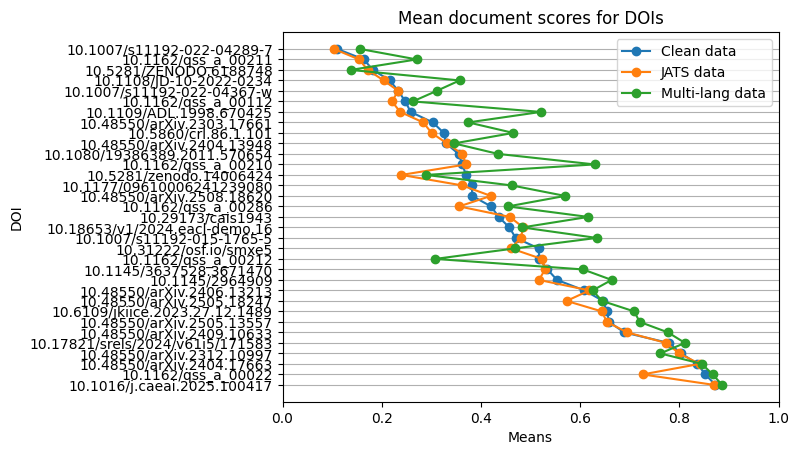

In [32]:
fig,ax = plt.subplots()
plt.plot(data_documents_score_grouped_together[['data_mean','jats_mean','multi_lang_mean']],
        data_documents_score_grouped_together['DOI'],
        marker='o',
        linestyle='-',data=data_documents_score_grouped_together)
plt.xlabel('Means')
plt.ylabel('DOI')
plt.title("Mean document scores for DOIs")
ax.legend(('Clean data', 'JATS data', 'Multi-lang data'), loc='upper right')
plt.grid(visible=True,axis='y')

plt.xlim(0, 1) # for scaled versions
plt.show()

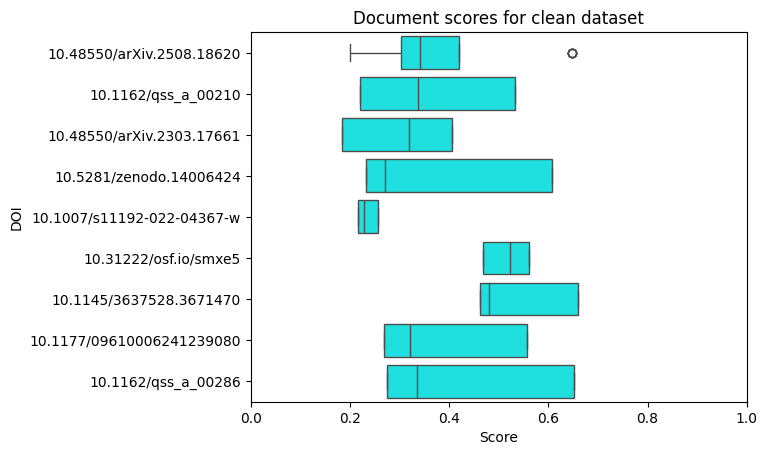

In [33]:
# count of DOIs - how is this different than golden set
data_documents_score_count = pd.DataFrame(data_documents_exploded.groupby(data_documents_exploded['DOI']).count())
data_documents_score_count = data_documents_score_count.sort_values('Score',ascending=False)

#save out
#data_documents_score_count.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/tables/data_documents_score_count.xlsx")

data_documents_score_count

# now let's look at only those with counts of DOIs 15 or higher - this may produce a better boxplot
# **********  SET THE FILTER TO AN APPROPRIATE AMOUNT *************
data_documents_score_count_top = data_documents_score_count[data_documents_score_count['Score']>=15]
data_documents_score_count_top.reset_index(inplace=True,drop=False)
data_documents_score_count_top_merged = data_documents_score_count_top.merge(data_documents_exploded, on='DOI', how='left')
data_documents_score_count_top_merged.rename(columns={'DOI':'DOI','Score_x':'Count','Score_y':'Score'},inplace=True)

sns.boxplot(x=data_documents_score_count_top_merged['Score'],
            y=data_documents_score_count_top_merged['DOI'],
            data=data_documents_score_count_top_merged,
            color='cyan',).set(title='Document scores for clean dataset')
plt.xlim(0, 1) # for scaled versions

plt.show()

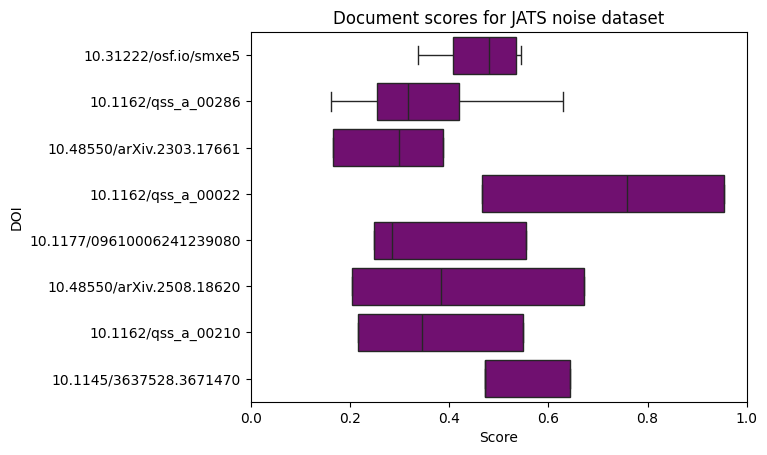

In [34]:
# let's do the same for JATS-tagged dataset
#data_jats_documents_exploded
# count of DOIs - how is this different than golden set
data_jats_documents_score_count = pd.DataFrame(data_jats_documents_exploded.groupby(data_jats_documents_exploded['DOI']).count())
data_jats_documents_score_count = data_jats_documents_score_count.sort_values('Score',ascending=False)

# now let's look at only those with counts of DOIs 15 or higher - this may produce a better boxplot
# ************* SET THE FILTER LIMIT ************
data_jats_documents_score_count_top = data_jats_documents_score_count[data_jats_documents_score_count['Score']>=15]
data_jats_documents_score_count_top.reset_index(inplace=True,drop=False)
data_jats_documents_score_count_top_merged = data_jats_documents_score_count_top.merge(data_jats_documents_exploded, on='DOI', how='left')
data_jats_documents_score_count_top_merged.rename(columns={'DOI':'DOI','Score_x':'Count','Score_y':'Score'},inplace=True)

sns.boxplot(x=data_jats_documents_score_count_top_merged['Score'],
            y=data_jats_documents_score_count_top_merged['DOI'],
            data=data_jats_documents_score_count_top_merged,
            color='purple',).set(title="Document scores for JATS noise dataset")
plt.xlim(0, 1) # for scaled versions
plt.show()

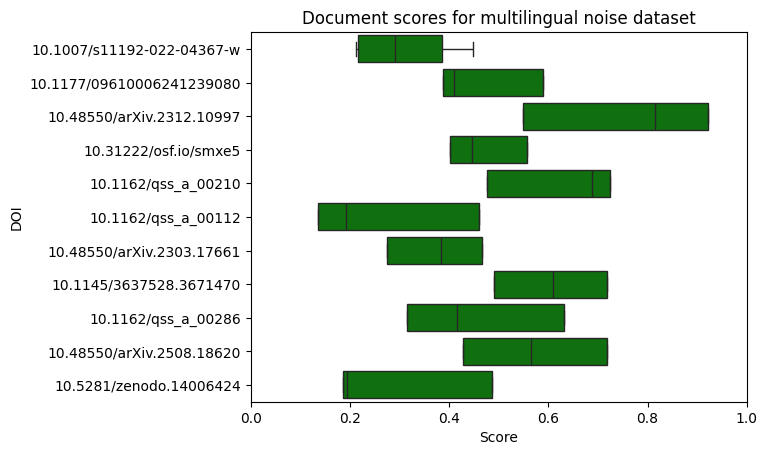

In [35]:
# let's do the same for multilingual dataset
#data_multi_lang_documents_exploded
# count of DOIs - how is this different than golden set
data_multi_lang_documents_score_count = pd.DataFrame(data_multi_lang_documents_exploded.groupby(data_multi_lang_documents_exploded['DOI']).count())
data_multi_lang_documents_score_count = data_multi_lang_documents_score_count.sort_values('Score',ascending=False)

# now let's look at only those with counts of DOIs 15 or higher - this may produce a better boxplot
# *********** SET THE FILTER LIMIT **********
data_multi_lang_documents_score_count_top = data_multi_lang_documents_score_count[data_multi_lang_documents_score_count['Score']>=15]
data_multi_lang_documents_score_count_top.reset_index(inplace=True,drop=False)
data_multi_lang_documents_score_count_top_merged = data_multi_lang_documents_score_count_top.merge(data_multi_lang_documents_exploded, on='DOI', how='left')
data_multi_lang_documents_score_count_top_merged.rename(columns={'DOI':'DOI','Score_x':'Count','Score_y':'Score'},inplace=True)

sns.boxplot(x=data_multi_lang_documents_score_count_top_merged['Score'],
            y=data_multi_lang_documents_score_count_top_merged['DOI'],
            data=data_multi_lang_documents_score_count_top_merged,
            color='green',).set(title="Document scores for multilingual noise dataset")

plt.xlim(0, 1) # for scaled versions
plt.show()

# Response analysis


In [36]:
# read in data
data_response = pd.read_excel("/Users/poppyriddle/Documents/PhD/Research_proposal/Part_3/part_3_cohere/analysis/Round1/results/clean_answer_relevance_results.xlsx", sheet_name='raw data',usecols="B,D", names=['Query','Answer relevance'])
data_jats_response = pd.read_excel("/Users/poppyriddle/Documents/PhD/Research_proposal/Part_3/part_3_cohere/analysis/Round1/results/jats_answer_relevance_results.xlsx", sheet_name='raw data',usecols="B,D", names=['Query','Answer relevance'])
data_multi_lang_response = pd.read_excel("/Users/poppyriddle/Documents/PhD/Research_proposal/Part_3/part_3_cohere/analysis/Round1/results/multi_lang_answer_relevance_results.xlsx", sheet_name='raw data',usecols="B,D", names=['Query','Answer relevance'])
print(f"Len multi_lang: {len(data_multi_lang_response)}")
print(f"Len jats: {len(data_jats_response)}")
print(f"Len data: {len(data_response)}")



Len multi_lang: 80
Len jats: 80
Len data: 80


In [37]:
data_response_grouped = pd.DataFrame(data_response.groupby(data_response['Query'])['Answer relevance'].agg('mean'))
data_response_grouped.reset_index(inplace=True,drop=False)
data_response_grouped

data_jats_response_grouped = pd.DataFrame(data_jats_response.groupby(data_jats_response['Query'])['Answer relevance'].agg('mean'))
data_jats_response_grouped.reset_index(inplace=True,drop=False)
data_jats_response_grouped

data_multi_lang_response_grouped = pd.DataFrame(data_multi_lang_response.groupby(data_multi_lang_response['Query'])['Answer relevance'].agg('mean'))
data_multi_lang_response_grouped.reset_index(inplace=True,drop=False)
data_multi_lang_response_grouped

response_grouped_together = data_response_grouped.merge(data_jats_response_grouped,on='Query')
response_grouped_together = response_grouped_together.merge(data_multi_lang_response_grouped,on='Query')
response_grouped_together.rename(inplace=True,columns={'Query':'Query',
                                                        'Answer relevance_x':'Relevance_data',
                                                        'Answer relevance_y':'Relevance_jats',
                                                        'Answer relevance':'Relevance_multi_lang'})
#save out
file_name = "response_grouped_together.xlsx"
save_location = f"{file_folder}{file_name}"
response_grouped_together.to_excel(save_location)
response_grouped_together

,Query,Relevance_data,Relevance_jats,Relevance_multi_lang
0,['How is RAG used to improve question answerin...,1.0,1.0,1.0
1,['Tell me about Crossref.'],1.0,1.0,1.0
2,['What are the key challenges and advancements...,1.0,1.0,1.0
3,['What are the key challenges and advancements...,1.0,1.0,1.0
4,['What are the key challenges and potential so...,1.0,1.0,1.0
5,['What are the key features and limitations of...,1.0,1.0,1.0
6,['What are the main challenges in normalizing ...,0.0,0.0,0.0
7,['What are the strengths and weaknesses of Web...,0.8,0.8,0.8
8,['What is Crossref’s role in the scholarly res...,1.0,1.0,1.0
9,['What methods are used to detect and correct ...,1.0,0.4,1.0


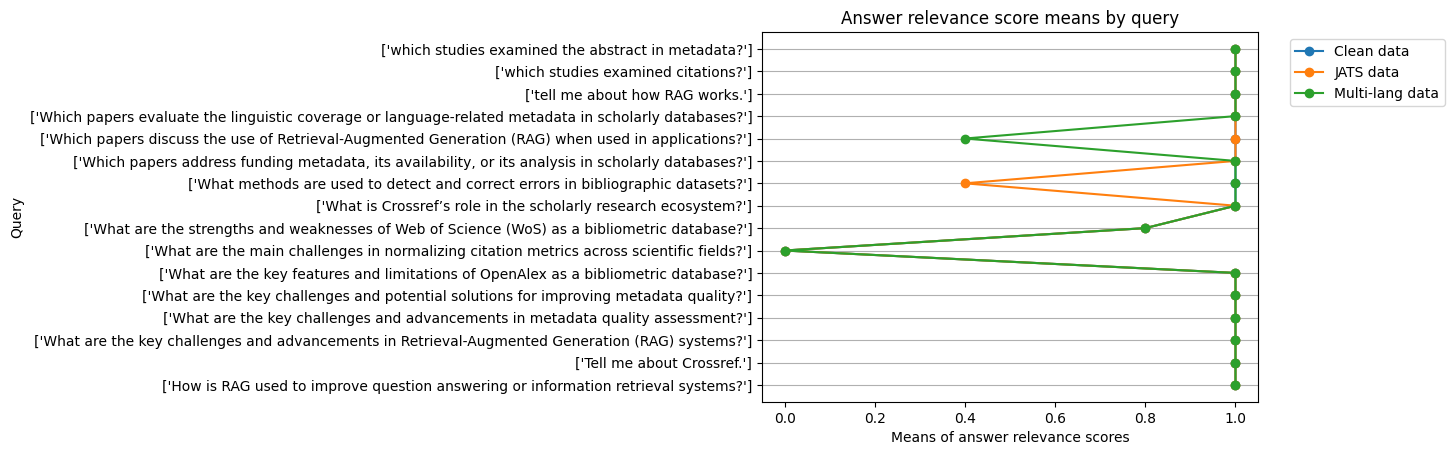

In [38]:
import matplotlib.pyplot as plt
# let's see a plot of these values
fig,ax = plt.subplots()
plt.plot(response_grouped_together[['Relevance_data','Relevance_jats','Relevance_multi_lang']],
        response_grouped_together['Query'],
        marker='o',
        linestyle='-',data=response_grouped_together)
plt.xlabel('Means of answer relevance scores')
plt.ylabel('Query')
plt.title("Answer relevance score means by query")
ax.legend(('Clean data', 'JATS data', 'Multi-lang data'), loc='best', bbox_to_anchor=(1.05,1))
plt.grid(visible=True,axis='y')
plt.show()